In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.cluster import KMeans
%matplotlib inline


In [16]:
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from imutils import paths
import numpy as np
import argparse
import imutils
import cv2
import os

In [41]:
dataset=pd.read_csv('gdrive/My Drive/SPCUP/Combined_v3.csv')
dataset.columns = dataset.columns.str.lower().str.replace(' ', '_')
dataset.head()
if set(['date']).issubset(dataset.columns):
    dataset.drop(['date'],axis=1, inplace=True)
    
#ds = dataset.sample(frac=1)
ds=dataset;
ds.tail()

FileNotFoundError: [Errno 2] File b'gdrive/My Drive/SPCUP/Combined_v3.csv' does not exist: b'gdrive/My Drive/SPCUP/Combined_v3.csv'

In [33]:
x = ds.iloc[:,0:75]
y = ds.iloc[:,75:76]


In [30]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.5, random_state=100)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)
plt.style.use('ggplot')


(165, 75) (165, 1)
(166, 75) (166, 1)


C:\Users\Akhil.pathak\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
C:\Users\Akhil.pathak\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
C:\Users\Akhil.pathak\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
C:\Users\Akhil.pathak\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
C:\Users\Akhil.pathak\Anaconda3\lib\site-packages\ipykernel_laun

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9879518072289156, 0.9879518072289156, 0.9879518072289156, 0.9879518072289156, 0.9879518072289156, 0.9879518072289156, 0.9397590361445783, 0.9457831325301205, 0.9096385542168675, 0.9096385542168675]


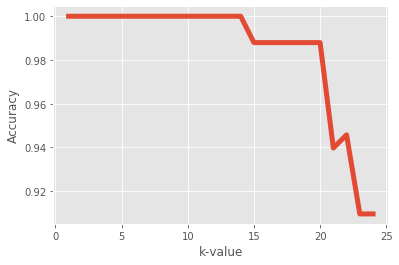

In [31]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
k_range = range(1,25)
scores = {}
scores_list = []
for k in k_range:
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train,y_train)
  y_pred = knn.predict(X_test)
  scores[k] = metrics.accuracy_score(y_test,y_pred)
  scores_list.append(metrics.accuracy_score(y_test,y_pred))
plt.plot(k_range,scores_list, linewidth=5)
plt.xlabel('k-value')
plt.ylabel('Accuracy')
print(scores_list)

In [32]:
scores = {}
knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
scores = metrics.accuracy_score(y_test,y_pred)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.89      0.94        18
           1       0.99      1.00      0.99       148

    accuracy                           0.99       166
   macro avg       0.99      0.94      0.97       166
weighted avg       0.99      0.99      0.99       166



C:\Users\Akhil.pathak\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until
